In [1]:
!pip install pandas
!pip install seaborn
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.count().head()

id                569
diagnosis         569
radius_mean       569
texture_mean      569
perimeter_mean    569
dtype: int64

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df=df.drop("Unnamed: 32",axis=1)
#on drop la colonne "Unnamed: 32" vu qu'on ne sait pas a quoi elle sert

In [7]:
df_features = df.drop("id", axis=1).drop("diagnosis", axis=1)
# les df_features seront les colonne qui nous servirons a faire des cluster 
# on drop la colonne id parce qu'elle n'est pas utilie ici et la colonne diagnosis sert a savoir si nous avons bien classifié les features

In [8]:
df_features.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df_labels = df['diagnosis']
# les df_labels nous permmettent de savoir qui a un cas de cancer bénigne ou maligne

In [10]:
# on va commencer par utiliser l'agorithme kmeans
tab_score = {} # on stockera les scores obtenus dans un dictionaire

df_labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [11]:
# on voit ici que les donnée ne sont pas formatée correctement


In [12]:
# on utilise LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_labels = le.fit_transform(df['diagnosis'])
#donc maintenant les cas de cancer malin sont representé par un 1 et les cas de cancer bénin sont représenté par un 0
# M = 1, B = 0

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, 
                                                    df_labels, test_size=0.4,
                                                    random_state=64)
#on sépare nos donnée pour faire des test pour les algorithme de cluster
# et on fait un group pour entrainer les algo et un groupe pour vérifier que leurs resultat sont bon

In [14]:
import seaborn as sns 
%matplotlib inline

matrice_corr = df.corr().round(1)
# ici la matrice est trop grande pour nous permettre de visualiser les corrélation

<AxesSubplot:>

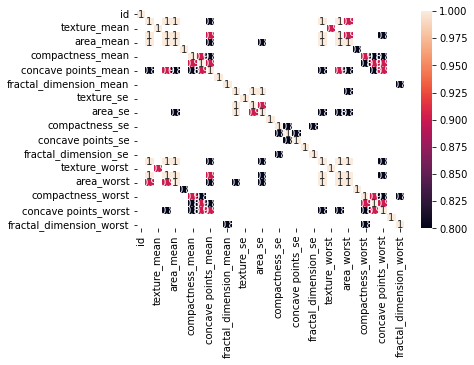

In [15]:
sns.heatmap(data=matrice_corr.where(matrice_corr > 0.7),annot=True)
#on peut faciliter la lecture en ne regardant que ce qui est fortement corrélé

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=18)
km.fit(X_train)
# on lance l'agorithme de kmeans

KMeans(n_clusters=2, random_state=18)

In [17]:
km.labels_

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

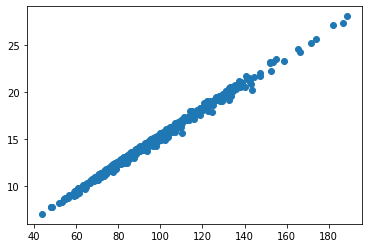

In [18]:
from matplotlib import pyplot as plt
plt.scatter(df_features.perimeter_mean, df_features.radius_mean)

In [19]:
colormap=np.array(['Red','green','blue'])

Text(0.5, 1.0, 'Clustering réel')

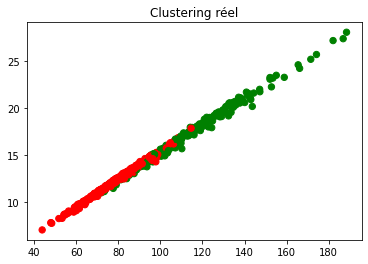

In [20]:
plt.scatter(df_features.perimeter_mean, df_features.radius_mean,
            c=colormap[df_labels],s=40)
plt.title('Clustering réel')

Text(0.5, 1.0, 'Clustering prédit par kMean')

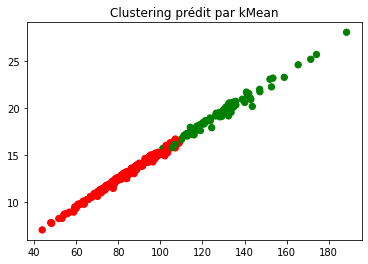

In [21]:
plt.scatter(X_train.perimeter_mean, X_train.radius_mean,
            c=colormap[km.labels_],s=40)
plt.title('Clustering prédit par kMean')

In [23]:
from sklearn.metrics import accuracy_score # Evaluation
km_ypred = km.predict(X_test)
tab_score['acc_score_km'] = (accuracy_score(y_test, km_ypred))

In [24]:
from sklearn.neighbors import KNeighborsClassifier # le classifieur

In [25]:

# Definir l'algorithme que je veux utiliser (KNN) avec le paramètre k=3
mon_knn = KNeighborsClassifier(n_neighbors=2)

#fitting : Lancer l'apprentissage ( données,labels)
mon_knn.fit(X_train, y_train)#.values.ravel())
# Evaluer l'entrainement de mon modèle
train_score = mon_knn.score(X_train, y_train)
print('train score = ',train_score )
tab_score['Knn_train_score'] = train_score

train score =  0.9384164222873901


In [26]:
#ypred : contient les prédictions de l'ensemble de test
knn_ypred = mon_knn.predict(X_test)

print ('KNN accuracy score')
print (accuracy_score(y_test, knn_ypred))
tab_score['acc_score_knn'] = (accuracy_score(y_test, knn_ypred))

KNN accuracy score
0.9254385964912281


In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(mon_knn, X_train, y_train, cv=5)
#scores = cross_val_score(mon_knn, df_features, df_labels, cv=5)
scores

array([0.86956522, 0.94117647, 0.95588235, 0.86764706, 0.94117647])

In [28]:
print("par validation croisée:  " , scores.mean())

par validation croisée:   0.9150895140664963


In [29]:
#importer l'algorithme tree
from sklearn import tree

from sklearn.tree import export_text
algo_tree = tree.DecisionTreeClassifier(max_depth=3)
algo_tree = algo_tree.fit(X_train, y_train)
r = export_text(algo_tree , feature_names = df_features.columns.array)
print(r)

# Evaluer l'entrainement de mon modèle
train_score = algo_tree.score(X_train, y_train)
print('train score = ',train_score )

|--- perimeter_worst <= 112.80
|   |--- concave points_worst <= 0.16
|   |   |--- texture_worst <= 29.98
|   |   |   |--- class: 0
|   |   |--- texture_worst >  29.98
|   |   |   |--- class: 0
|   |--- concave points_worst >  0.16
|   |   |--- radius_mean <= 10.22
|   |   |   |--- class: 0
|   |   |--- radius_mean >  10.22
|   |   |   |--- class: 1
|--- perimeter_worst >  112.80
|   |--- concavity_worst <= 0.22
|   |   |--- smoothness_se <= 0.00
|   |   |   |--- class: 1
|   |   |--- smoothness_se >  0.00
|   |   |   |--- class: 0
|   |--- concavity_worst >  0.22
|   |   |--- radius_worst <= 16.28
|   |   |   |--- class: 0
|   |   |--- radius_worst >  16.28
|   |   |   |--- class: 1

train score =  0.9706744868035191


In [30]:
ypred = algo_tree.predict(X_test)

print ('Decision tree accuracy score')
print (accuracy_score(y_test, ypred))

Decision tree accuracy score
0.9122807017543859


In [31]:
tab_score['acc_score_tree'] = accuracy_score(y_test, ypred)

In [109]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# on utilise le standard Scaler pour uniformiser les valeurs
LinearSVC = make_pipeline(StandardScaler(),LinearSVC(random_state=25, tol=1e-3 ,C=2.0,max_iter=5000))
y_pred_linSVC = LinearSVC.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_LinSVC'] = accuracy_score(y_test,y_pred_linSVC)
print(tab_score['acc_score_LinSVC'])

0.9649122807017544


In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)

y_pred_rfc = rfc.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_RandomForest'] = accuracy_score(y_test,y_pred_rfc)

In [34]:
# apres avoir test BernouilliNB j'ai vu qu'il etait fait pour des donnée binaire comme ce n'est pas le cas ici je ne l'utilise pas et prend un autre azlgo
from sklearn.naive_bayes import MultinomialNB
MultinomiNB = MultinomialNB()

y_pred_multinomial =MultinomiNB.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_MultinomialNB'] = accuracy_score(y_test,y_pred_multinomial)

In [35]:
from sklearn.naive_bayes import CategoricalNB
catNB = CategoricalNB()
#y_pred_catNB = catNB.fit(X_train, y_train).predict(X_test)
#tab_score['acc_score_CategoricalNB'] = accuracy_score(y_test,y_pred_catNB)
#ne fonctionne pas pour une raison qui m'est inconnue


In [36]:
from sklearn.gaussian_process import GaussianProcessClassifier

gpc = GaussianProcessClassifier(random_state=10)
y_pred_gpc = gpc.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_gpc'] = accuracy_score(y_test,y_pred_gpc)
#cet algorithme est très mauvais avec un score inferieur a 0.8

In [37]:
from sklearn.naive_bayes import ComplementNB
ComplNB = ComplementNB()
y_pred_complNB = ComplNB.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_complNB'] = accuracy_score(y_test,y_pred_complNB)
# meme score que multinomialNB


In [38]:
scores_linSVC = cross_val_score(LinearSVC, X_train, y_train, cv=5)
#scores = cross_val_score(mon_knn, df_features, df_labels, cv=5)
scores_linSVC
print("par validation croisée:  " , scores_linSVC.mean())

par validation croisée:   0.9678175618073317


In [39]:
from sklearn.linear_model import RidgeClassifierCV
RidgclassCV = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1])
y_pred_ridgecv = RidgclassCV.fit(X_train, y_train).predict(X_test)
ridgecv_score = RidgclassCV.score(X_train, y_train)
print(ridgecv_score)
tab_score['acc_score_ridgclassCV'] = accuracy_score(y_test,y_pred_ridgecv)

0.9706744868035191


In [40]:
from sklearn.linear_model import RidgeClassifier
ridgeclass = RidgeClassifier()
y_pred_ridgeclas = ridgeclass.fit(X_train, y_train).predict(X_test)
ridge_score = ridgeclass.score(X_train, y_train)
print(ridge_score)
tab_score['acc_score_ridgclass'] = accuracy_score(y_test,y_pred_ridgeclas)

0.967741935483871


In [59]:
from sklearn.linear_model import PassiveAggressiveClassifier

pass_agg_clas = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
y_pred_pass_agg_clas = pass_agg_clas.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_pass_agg_class'] = accuracy_score(y_test,y_pred_pass_agg_clas)

In [61]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(tol=1e-3, random_state=0)
y_pred_perceptron = perceptron.fit(X_train, y_train).predict(X_test)
tab_score['acc_score_perceptron'] = accuracy_score(y_test,y_pred_perceptron)

In [62]:
tab_score

{'acc_score_km': 0.8640350877192983,
 'Knn_train_score': 0.9384164222873901,
 'acc_score_knn': 0.9254385964912281,
 'acc_score_tree': 0.9122807017543859,
 'acc_score_LinSVC': 0.9605263157894737,
 'acc_score_RandomForest': 0.9429824561403509,
 'acc_score_MultinomialNB': 0.8859649122807017,
 'acc_score_gpc': 0.7324561403508771,
 'acc_score_complNB': 0.881578947368421,
 'acc_score_ridgclassCV': 0.9429824561403509,
 'acc_score_ridgclass': 0.9385964912280702,
 'acc_score_pass_agg_class': 0.9122807017543859,
 'acc_score_perceptron': 0.9078947368421053}

In [110]:

print("le score le plus élevé est")
print(list(tab_score.keys())[list(tab_score.values()).index(max(tab_score.values()))])
print(max(tab_score.values()))


le score le plus élevé est
acc_score_LinSVC
0.9649122807017544
